# Initialization

In [1]:
%load_ext autoreload
%autoreload 2

from jlib.transformer_char_predictor import TransformerCharPredictor
import jlib.data_utils as data_utils
import torch
import torch.nn as nn
import numpy as np
from torchprofile import profile_macs
text = ""
with open('data/sequence.txt', 'r') as f:
    text = f.read()


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seqlen = 10
def train_and_plot(seqlen: int):
    data = data_utils.gen_datasets(text, seqlen)
    train_data = data['train_dataset']
    val_data = data['val_dataset']
    alphabet: data_utils.Alphabet = data['alphabet']

    train_fetcher = data_utils.gen_data_loader(
        train_data,
        batch_size=32,
        workers = 6,
        cpu_prefetch= 20,
        gpu_prefetch=20
    )

    val_fetcher = data_utils.gen_data_loader(
        val_data,
        batch_size=len(val_data),
        workers = 6,
        cpu_prefetch= 10,
        gpu_prefetch=10
    )

    # model

    model = TransformerCharPredictor(
        alphabet_size = len(alphabet),
        max_len = seqlen,
        hidden_dim = 2048,
        inner_dim = 2048,
        num_attn_heads = 2,
        num_attn_layers=3,
        cls_head_dims=[256],
        dropout = 0.1
    )

    param_count = sum(p.numel() for p in model.parameters())
    print(f"Model parameter count: {param_count:,}")

    test_input = next(iter(train_fetcher))[0]

    print(f"Model MACs: {profile_macs(model, test_input):,}")
    
# Model parameter count: 1,790,380
# Model MACs: 568,279,052



    model.train_model(
        epochs=200,
        train_fetcher=train_fetcher,
        val_fetcher=val_fetcher,
        optimizer = torch.optim.Adam,
        optimizer_kwargs={
            'lr': 3e-5,
            'betas': (0.9, 0.98),
            'eps': 1e-9,
            'weight_decay': 1e-5
        },
        min_accuracy=1,
        max_negative_diff_count=20,
        stop_on_plateau=True,
        print_epoch=1,
        header_epoch = 15,
    )

    fig = model.plot_training(f'Small Corpus, Sequence Length {seqlen}')
    fig.savefig(f'latex/images/p1-{seqlen}.png')
    
    del train_fetcher, val_fetcher, train_data, val_data, data, model, alphabet
    





# Training

Begin init data loader
Batch Size: 0.00244140625 MiB
Data Loader init time: 1.365351 s
Begin init fetcher
Fetcher init time: 1.422627 s
Begin init data loader
Batch Size: 0.00335693359375 MiB
Data Loader init time: 0.240731 s
Begin init fetcher
Fetcher init time: 0.288465 s
Model parameter count: 76,184,876
Model MACs: 24,334,499,852
Training TransformerCharPredictor

----------------------------------------------------------------------------------------------------------------------------------------------------
Begin Training


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unflatten". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::scaled_dot_product_attention". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::permute". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


|       Epoch        |   Epoch Time (s)   |   Training Loss    |  Validation Loss   |Validation Accuracy |   Δ Accuracy (%)   |    Memory Usage    |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      0.922052      |      3.540584      |      3.273768      |     15.909091      |         inf        |      2.750804      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      0.467673      |      3.236971      |      3.059493      |     26.590911      |     67.142868      |      2.754711      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         2          |      0.468994      |      3.103952      |      2.863611      |     34.318182      |

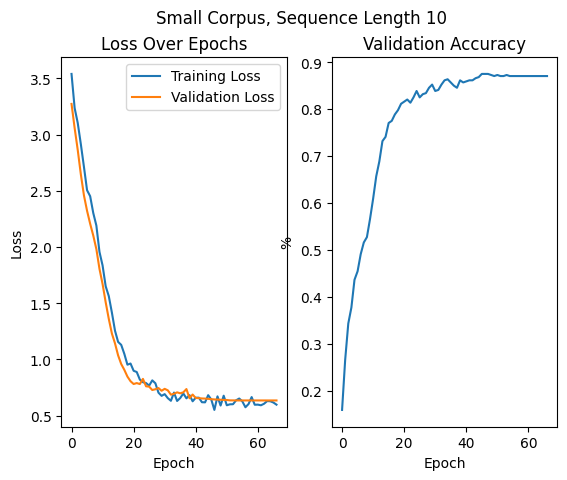

In [3]:
train_and_plot(10)


Begin init data loader


Batch Size: 0.0048828125 MiB
Data Loader init time: 0.136663 s
Begin init fetcher
Fetcher init time: 0.242646 s
Begin init data loader
Batch Size: 0.003509521484375 MiB
Data Loader init time: 0.212370 s
Begin init fetcher
Fetcher init time: 0.301313 s
Model parameter count: 76,184,876
Model MACs: 48,668,999,692
Training TransformerCharPredictor

----------------------------------------------------------------------------------------------------------------------------------------------------
Begin Training


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unflatten". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::scaled_dot_product_attention". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::permute". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


|       Epoch        |   Epoch Time (s)   |   Training Loss    |  Validation Loss   |Validation Accuracy |   Δ Accuracy (%)   |    Memory Usage    |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      0.380050      |      3.739851      |      3.572826      |      8.043478      |         inf        |      2.807524      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      0.357750      |      3.510863      |      3.346818      |     19.130434      |     137.837830     |      2.807524      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         2          |      0.353680      |      3.363393      |      3.265888      |     15.869565      |

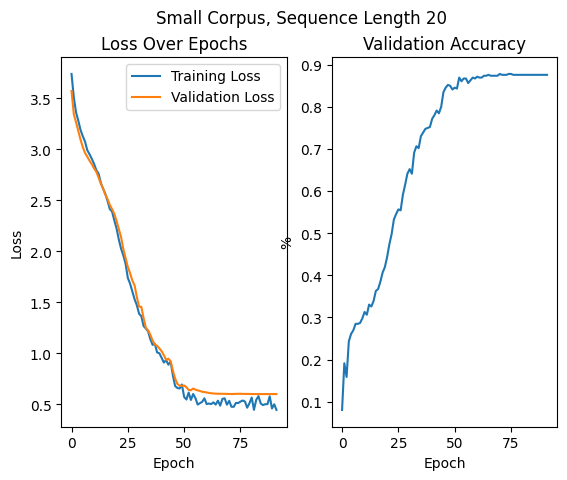

In [4]:
train_and_plot(20)


Begin init data loader


Batch Size: 0.00732421875 MiB
Data Loader init time: 0.120885 s
Begin init fetcher
Fetcher init time: 0.205206 s
Begin init data loader
Batch Size: 0.003662109375 MiB
Data Loader init time: 0.170585 s
Begin init fetcher
Fetcher init time: 0.254101 s
Model parameter count: 76,184,876
Model MACs: 73,003,499,532
Training TransformerCharPredictor

----------------------------------------------------------------------------------------------------------------------------------------------------
Begin Training


/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unflatten". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::unsqueeze". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::scaled_dot_product_attention". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/home/jaskin/Intro_Deep_Learning/env/lib/python3.11/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::permute". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


|       Epoch        |   Epoch Time (s)   |   Training Loss    |  Validation Loss   |Validation Accuracy |   Δ Accuracy (%)   |    Memory Usage    |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         0          |      0.385686      |      3.764088      |      3.595068      |     11.875000      |         inf        |      2.808487      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         1          |      0.336089      |      3.545074      |      3.441270      |     12.916666      |      8.771928      |      2.808487      |
----------------------------------------------------------------------------------------------------------------------------------------------------
|         2          |      0.318191      |      3.422755      |      3.293445      |     12.291667      |

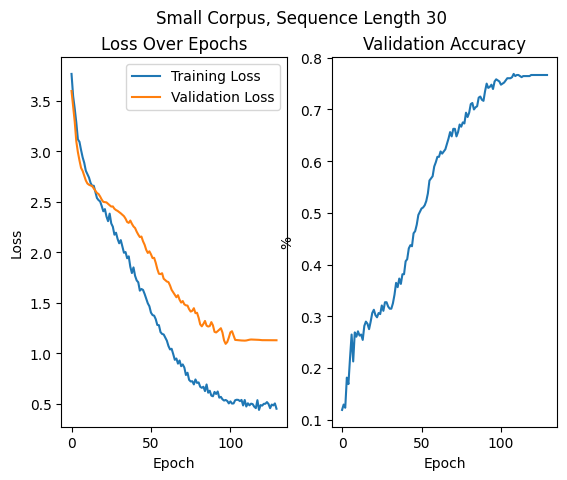

In [5]:
train_and_plot(30)
